In [1]:
# %matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import matplotlib.pyplot as plt

import glob
import itertools
import os

import sys
sys.path.append('..')

from run import Run
from run_db import db as run_db
from run_utils import init_runs, find_runs

tasks = ['dep', 'lmo', 'ner', 'pos']
langs = ['cs', 'de', 'en', 'es']

log_path = '/home/fiit/logs/'

runs = init_runs(log_path, run_db)

[('deepnet5', 312), ('deepnet2070', 336)]


In [3]:
def draw_graphs(runs, tasks, langs, role, metric=None, focused=False, label=None):
    
    if label is None:
        label = lambda run: f'{run.name}-{run.type}'
    
    fig, axes = plt.subplots(
        len(tasks),
        len(langs),
        figsize=(5*len(langs), 4*len(tasks)),
        squeeze=False)

    for ax_row, task in zip(axes, tasks):
        for ax, lang in zip(ax_row, langs):
            for run in runs:
                if not focused or run.config['focus_on'] == f'{task}-{lang}':
                    history = run.history(
                        metric=metric,
                        task=task,
                        language=lang,
                        role=role)
                    ax.plot(list(history), label=label(run))

    for ax, lang in zip(axes[0], langs):
        ax.set_title(lang)

    for ax, task in zip(axes[:, 0], tasks):
        ax.set_ylabel(task, rotation=0, size='large')
        
    for ax_row in axes:
        for ax in ax_row:
            ax.legend()

    plt.show()

    
def results(runs, tasks, langs, focused=True, values_only=False):
    
    def get_results(run):
        out = {}
        for task, lang in itertools.product(tasks, langs):
            run.load()
            if not focused or run.config['focus_on'] == f'{task}-{lang}':
                res, epoch = run.best(task=task, language=lang)
                if res <= 1.01:
                    res *= 100
                out[(task, lang)] = res, epoch
        return out
    
    out = {
        run: get_results(run)
        for run in runs}
    
    if values_only:
        return [list(run.values())[0][0] for run in out.values()]
    else:
        return out

# tmp_runs = find_runs(runs, name='zero-shot-task-lang-ortho-10')
# res = results(tmp_runs, tasks, langs, focused=True)
# print(list(res.values()))

In [4]:
import numpy as np

def tempo(name, type='all'):    
    out = results(
        runs=find_runs(
            runs,
            type=type,
            name=name
        ),
        tasks=tasks,
        langs=langs,
        values_only=True
    )
    for value in out:
        print(f'{value:.2f} ', end='')
    print(np.round([np.mean(out[:4]), np.mean(out[4:8]), np.mean(out[8:])], decimals=2))

tempo('zero-shot-two-by-two', 'var')

49.37 57.57 48.44 81.51 84.35 86.67 62.92 67.56 64.33 67.98 70.02 65.64 50.60 52.56 47.21 54.29 56.60 43.19 22.68 24.05 22.65 24.98 27.52 25.26 47.74 48.94 48.77 49.26 48.48 49.19 21.62 17.51 21.19 28.71 37.37 30.61 23.56 22.67 21.81 24.21 33.22 22.27 46.78 43.77 44.85 46.58 47.90 51.49 44.66 45.27 43.45 50.76 52.09 33.78 65.54 69.80 66.27 67.41 68.02 67.94 32.15 35.51 31.44 50.74 48.61 24.22 57.03 66.09 64.50 66.97 67.50 64.74 60.48 64.63 59.78 79.59 81.77 82.49 23.21 20.78 23.69 26.01 33.36 18.22 31.33 35.42 30.94 37.73 52.58 50.47 31.08 27.65 31.58 27.51 38.22 33.69 44.19 43.37 43.04 46.44 47.94 45.44 62.49 69.67 60.26 71.44 72.09 56.46 73.93 80.72 75.47 84.42 83.82 87.29 24.46 23.70 23.56 34.11 45.42 45.92 [59.22 75.37 46.7 ]


In [5]:
tempo('zero-shot', 'ml-3')
tempo('zero-shot', 'rel')
tempo('zero-shot')
tempo('zero-shot-400')
print()
tempo('zero-shot')
tempo('zero-shot-task')
tempo('zero-shot-lang')
tempo('zero-shot-task-lang-no-global')
tempo('zero-shot-task-lang')
print()
tempo('zero-shot-task-lang')
tempo('zero-shot-task-lang-ortho-10')
tempo('zero-shot-task-lang-ortho-25')
tempo('zero-shot-task-lang-ortho-50')
tempo('zero-shot-task-lang-ortho-100')
tempo('zero-shot-task-lang-ortho-200')
print()
tempo('zero-shot-task-lang-no-global')
tempo('zero-shot-task-lang-no-global-ortho-50')
tempo('zero-shot-task-lang-no-global-ortho-100')
tempo('zero-shot-task-lang-no-global-ortho-200')
print()
tempo('zero-shot')
tempo('zero-shot-task-emb')
tempo('zero-shot-lang-emb')
tempo('zero-shot-embs')
tempo('zero-shot-embs-400')
tempo('zero-shot-task-lang-both-embs')
print()
tempo('zero-shot')
tempo('zero-shot-task-emb')
tempo('zero-shot-lang-emb')
tempo('zero-shot-embs')
tempo('zero-shot-embs-400')
tempo('zero-shot-task-lang-both-embs')
print()
tempo('zero-shot', 'ml-3')
tempo('zero-shot')
tempo('zero-shot-embs')
tempo('zero-shot-task-lang')
print()
tempo('zero-shot-rotated', 'ml-3')
tempo('zero-shot-rotated')
tempo('zero-shot-embs-rotated')
tempo('zero-shot-task-lang-rotated')
print()
tempo('zero-shot-char-level', 'ml-3')
tempo('zero-shot-char-level')
tempo('zero-shot-embs-char-level')
tempo('zero-shot-task-lang-char-level')
print()
tempo('zero-shot')
tempo('zero-shot-adversarial')
tempo('zero-shot-adversarial-embs')

30.65 49.63 48.30 32.38 42.25 57.53 49.57 53.27 68.84 80.00 75.05 57.72 [40.24 50.66 70.4 ]
33.93 50.10 42.19 31.74 49.71 62.04 51.81 56.35 76.69 80.66 80.87 73.21 [39.49 54.98 77.86]
44.14 59.97 45.34 44.19 52.20 64.38 55.00 61.54 83.47 85.15 84.72 84.93 [48.41 58.28 84.57]
45.42 61.55 50.95 47.35 55.10 65.90 54.51 60.99 82.14 86.25 84.72 86.40 [51.32 59.13 84.88]

44.14 59.97 45.34 44.19 52.20 64.38 55.00 61.54 83.47 85.15 84.72 84.93 [48.41 58.28 84.57]
50.14 60.72 53.57 53.82 50.67 63.18 53.98 60.94 87.10 87.00 84.30 89.96 [54.56 57.19 87.09]
44.25 56.21 55.39 53.47 47.90 66.35 55.10 61.52 75.99 83.66 78.51 76.73 [52.33 57.72 78.72]
51.83 61.91 58.67 61.28 50.29 66.92 53.08 61.20 84.52 87.35 83.99 87.78 [58.42 57.87 85.91]
52.90 62.09 59.11 62.05 53.06 67.04 55.28 63.53 86.56 87.32 84.15 88.81 [59.04 59.73 86.71]

52.90 62.09 59.11 62.05 53.06 67.04 55.28 63.53 86.56 87.32 84.15 88.81 [59.04 59.73 86.71]
53.05 63.72 60.15 62.33 53.28 65.92 55.02 62.73 85.09 87.82 83.90 89.06 [59.81

/home/fiit/PycharmProjects/cll/.venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/fiit/PycharmProjects/cll/.venv/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [16]:
tempo('zero-shot')
tempo('zero-shot-adversarial')
tempo('zero-shot-adversarial-embs')
tempo('zero-shot-adversarial-task-lang')

44.14 59.97 45.34 44.19 52.20 64.38 55.00 61.54 83.47 85.15 84.72 84.93 [48.41 58.28 84.57]
56.06 63.72 57.89 63.27 52.23 67.89 54.76 62.63 83.03 86.71 84.50 86.89 [60.23 59.38 85.28]
41.53 60.00 44.05 54.22 52.75 65.61 54.57 61.77 80.73 85.53 81.16 [49.95 58.68 82.47]
51.18 55.98 52.11 54.60 48.92 [53.47 48.92   nan]


{'loss': 1.7785075, 'adv_loss': 0.6977284, 'gradient_norm': 1.0130074, 'unit_strength': 0.0008136771, 'ortho': 0.0, 'uas': 0.41540595890863447, 'las': 0.2552024839796525, 'language': 'cs', 'task': 'dep', 'role': 'train', 'epoch': 1}


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


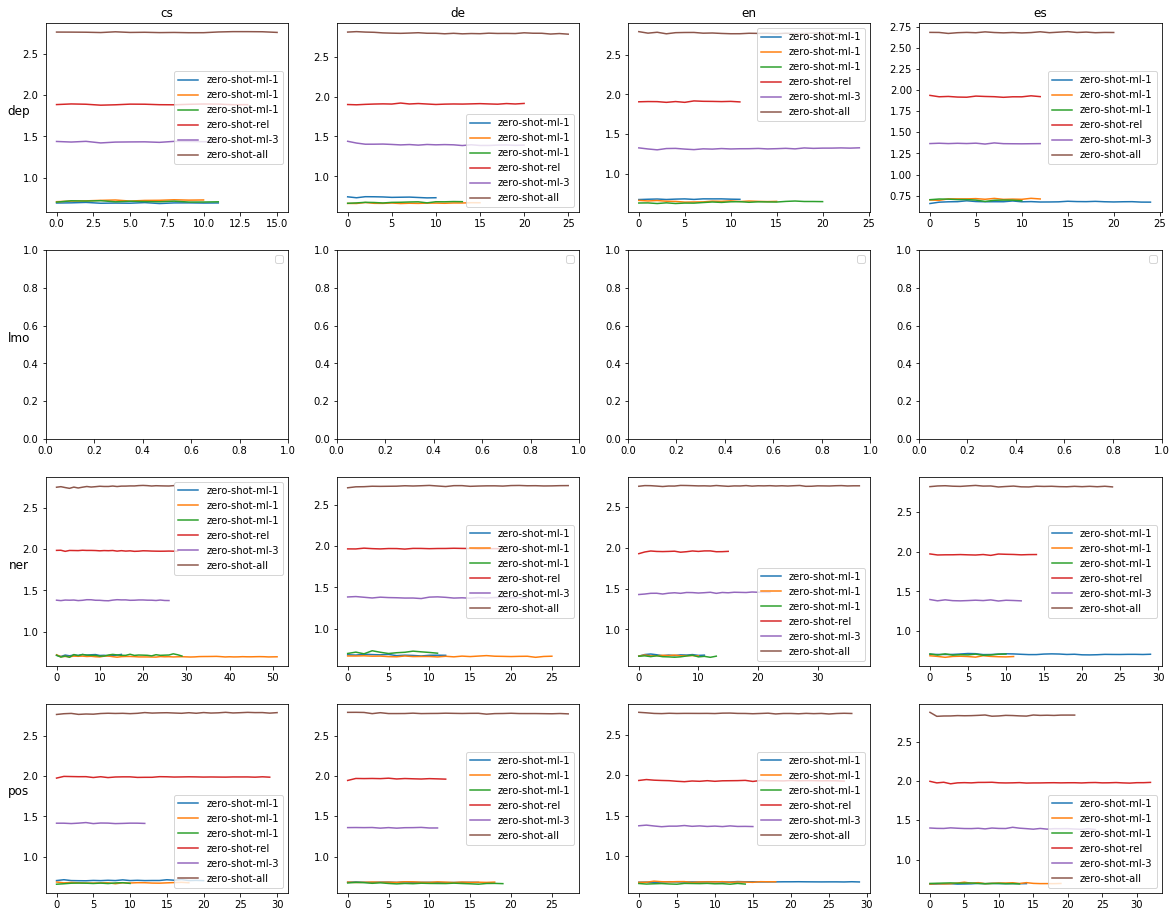

In [15]:
tmp = find_runs(runs, name='zero-shot')
print(tmp[0].data[0])
draw_graphs(tmp, tasks, langs, 'test', metric='adv_loss', focused=True)
